In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.environ["KERAS_BACKEND"] = "torch"
import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

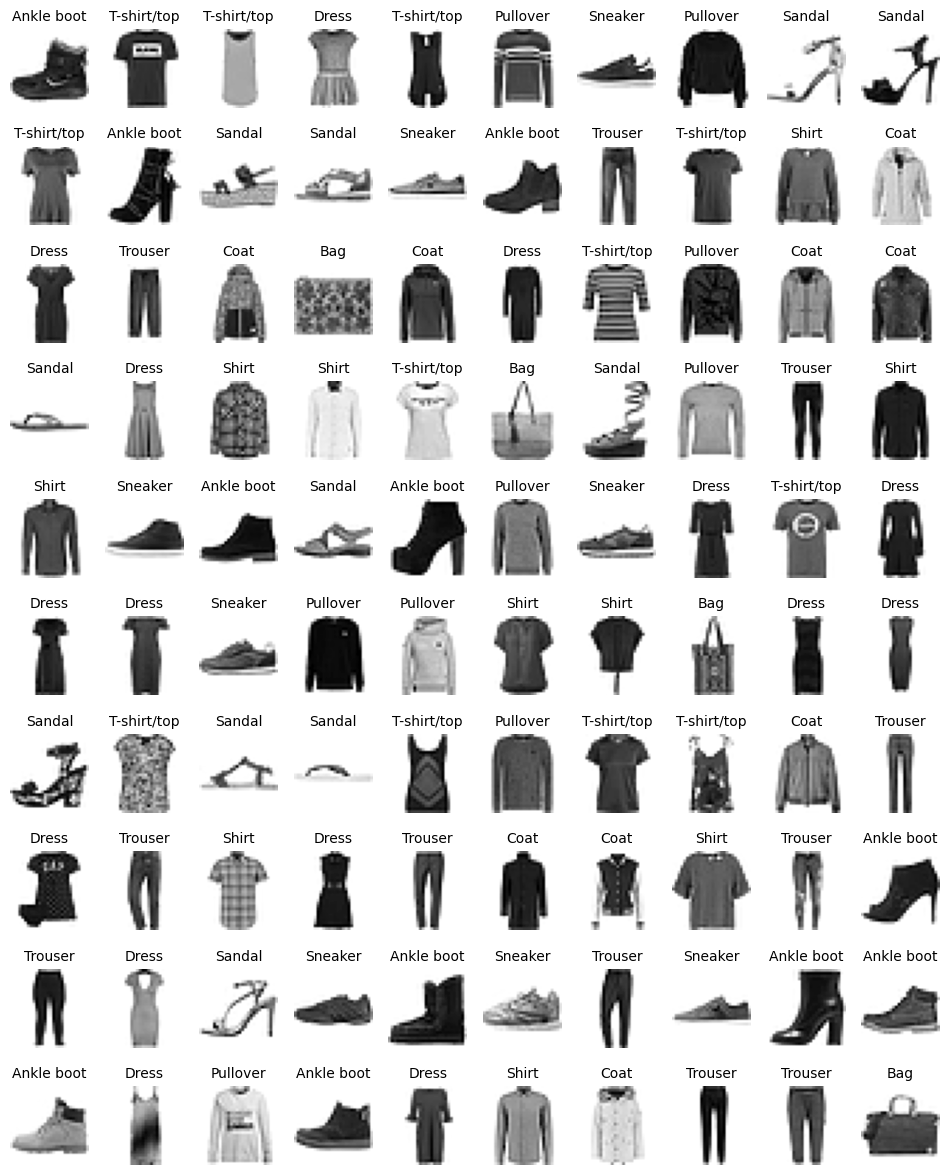

In [4]:
plt.figure(figsize=(12,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train_full[i], cmap="binary")
    plt.axis("off")
    plt.title(class_names[y_train_full[i]], fontsize=10)
plt.show()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train[0].shape

(28, 28)

In [10]:
# Nei layer convoluzionali il numero di parametri (i.e. pesi) 
# è dato da: 
# param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)
# quindi ad esempio nel caso del primo layer:
# output_channel_number = 64, ci sono 64 filtri convoluzionali
# input_channel_number = 1, l'input è (28, 28, 1) perchè è un immagine in scala di grigio
# kernel_height * kernel_width = 7 * 7
# 64 * (1 * 7 * 7 + 1) = 3200 

# la dimensione di output del layer (in caso di padding=same e stride=0) è la stessa del blocco in ingresso.
# solo nell'ultima dimensione ci saranno tanti valori quanti il numero di filitri convoluzionali


# per il layer maxpooling2d the default is padding=valid, cioè applico il padding solo gli input completi (non faccio 0-padding)
# output_shape = math.floor((input_shape - pool_size) / strides) + 1
# quindi ad esempio con un input (28, 28, 64) e un pool_size = stride = 2
# (28 - 2) / 2 + 1 = 14


num_classes = 10
input_shape = (28, 28, 1)

model = keras.models.Sequential([
keras.layers.Input(shape=input_shape),
keras.layers.Conv2D(64, 7, activation="relu", padding="same", name='conv1'),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same", name='conv2'),
keras.layers.Conv2D(128, 3, activation="relu", padding="same", name='conv3'),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same",name='conv4'),
keras.layers.Conv2D(256, 3, activation="relu", padding="same",name='conv5'),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(num_classes, activation="softmax")
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [12]:
print(X_train.shape)

(55000, 28, 28)


We use the "sparse_categorical_cross
entropy" loss because we have sparse labels (i.e., for each instance, there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we
had one target probability per class for each instance (such as one-hot vectors, e.g.
[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would
need to use the "categorical_crossentropy" loss instead. If we were doing binary
classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

In [13]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3442 - loss: 1.7599
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6883 - loss: 0.8587
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7406 - loss: 0.7054
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7794 - loss: 0.6096
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8030 - loss: 0.5539
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8171 - loss: 0.5226
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8315 - loss: 0.4854
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8394 - loss: 0.4548
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8514 - loss: 0.4322
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8521 - loss: 0.4285


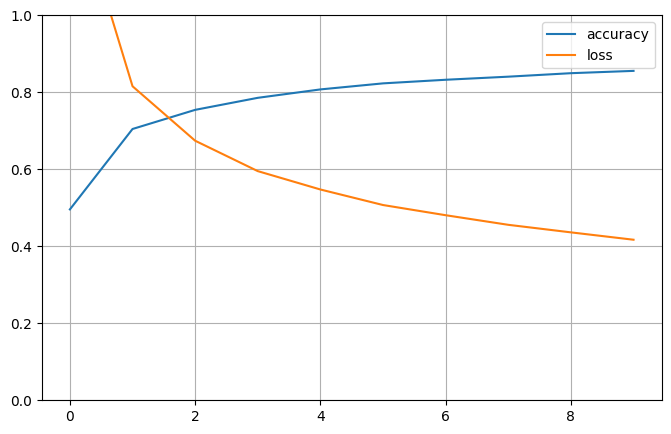

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

If you are not satisfied with the performance of your model, you should go back and
tune the hyperparameters. The first one to check is the learning rate. If that doesn’t
help, try another optimizer (and always retune the learning rate after changing any
hyperparameter). If the performance is still not great, then try tuning model hyperparameters
such as the number of layers, the number of neurons per layer, and the
types of activation functions to use for each hidden layer. You can also try tuning
other hyperparameters, such as the batch size

In [15]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8499 - loss: 2.3565


[2.4210867881774902, 0.8458999991416931]

In [16]:
print('GT =',class_names[y_test[0]])
p=model.predict(X_test[[0]])
classes_x=np.argmax(p,axis=1)
print('Prediction =',class_names[classes_x[0]])


GT = Ankle boot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction = Ankle boot


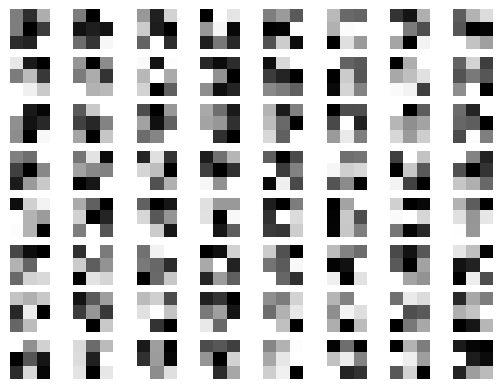

In [34]:
# voglio visualizzare i pesi dei nodi convoluzionali

n_filters, plt_nrow, plt_col = 64,8,8
layer_name = 'conv1' 

n_filters, plt_nrow, plt_col = 64,8,8
layer_name = 'conv5'  


conv_layer = model.get_layer(name=layer_name)

# Get the filters and biases of the layer
filters, biases = conv_layer.get_weights()

# Normalize the filter values to a range between 0 and 1 for better visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#print(filters.shape)
for i in range(n_filters):
    # Get the filter (you can visualize more by increasing `n_filters`)
    f = filters[:, :, :, i]
    plt.subplot(plt_nrow, plt_ncol, i+1)
    plt.axis("off")
    # Plot the filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
   
        

# Display the filters
plt.show()